## I propose the question "Does a student's parental education and ethnic background have any basis on how a student will perform on a Math/Reading/Writing Test

In [1]:
import numpy as np
import pandas as pd
pd.set_option('max_columns',100)
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# sns.set_style('darkgrid')
import warnings
warnings.filterwarnings(action='ignore',category=FutureWarning)
import pickle

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict, cross_val_score, train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, f1_score
from scipy.stats import zscore

C:\Users\ccurrent\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


#### Does the level of education and the race/ethnicity influence the score of a student's math, reading and writing score.

In [3]:
data = pd.read_csv('StudentsPerformance.csv', names=['gender', 'race', 'parental_level_of_education', 'lunch',
                                                    'test_prep', 'math_score', 'reading_score', 'writing_score'],
                                              skiprows=1)
df = data.copy()
df.head(2)

,gender,race,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88


In [4]:
df.groupby('race').agg('count')

,gender,parental_level_of_education,lunch,test_prep,math_score,reading_score,writing_score
race,,,,,,,
group A,89,89,89,89,89,89,89
group B,190,190,190,190,190,190,190
group C,319,319,319,319,319,319,319
group D,262,262,262,262,262,262,262
group E,140,140,140,140,140,140,140


#### All genders have a +/- 6.78% with the exception of the Master's degree category where female students have +22.04% in count 

In [5]:
crosstab = pd.crosstab(df.loc[:,'parental_level_of_education'],df['gender'])
crosstab['female_percentage'] = np.round(crosstab['female']/(crosstab['female']+crosstab['male'])*100,2)
crosstab['male_percentage'] = np.round(crosstab['male']/(crosstab['female']+crosstab['male'])*100,2)
crosstab['percentage_difference'] = np.abs(crosstab['female_percentage']-crosstab['male_percentage'])
crosstab.drop(['female','male'],axis=1,inplace=True)
crosstab

gender,female_percentage,male_percentage,percentage_difference
parental_level_of_education,,,
associate's degree,52.25,47.75,4.50
bachelor's degree,53.39,46.61,6.78
high school,47.96,52.04,4.08
master's degree,61.02,38.98,22.04
some college,52.21,47.79,4.42
some high school,50.84,49.16,1.68


#### The female to male representation in accordance to race vary greatly with the exception of group D and group E

In [6]:
crosstab = pd.crosstab(df.loc[:,'race'],df['gender'])
crosstab['female_percentage'] = np.round(crosstab['female']/(crosstab['female']+crosstab['male'])*100,2)
crosstab['male_percentage'] = (np.round(crosstab['male']/(crosstab['female']+crosstab['male'])*100,2))
crosstab['percentage_difference'] = np.abs(crosstab['female_percentage']-crosstab['male_percentage'])
crosstab.drop(['female','male'],axis=1,inplace=True)
crosstab

gender,female_percentage,male_percentage,percentage_difference
race,,,
group A,40.45,59.55,19.10
group B,54.74,45.26,9.48
group C,56.43,43.57,12.86
group D,49.24,50.76,1.52
group E,49.29,50.71,1.42


In [7]:
crosstab = pd.crosstab(df.loc[:,'race'],df['parental_level_of_education'])
crosstab

parental_level_of_education,associate's degree,bachelor's degree,high school,master's degree,some college,some high school
race,,,,,,
group A,14,12,18,3,18,24
group B,41,20,48,6,37,38
group C,78,40,64,19,69,49
group D,50,28,44,23,67,50
group E,39,18,22,8,35,18


#### What is interesting in the following kernel density plot is that groups based on race perform in an equally distributed  and aligned form based of the mean performance in their respective race/ethnicity

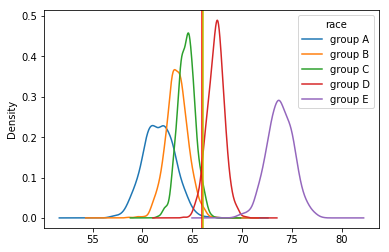

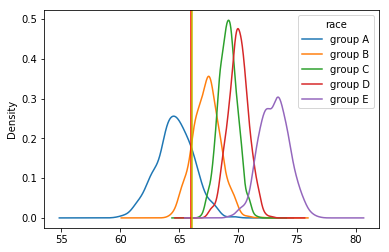

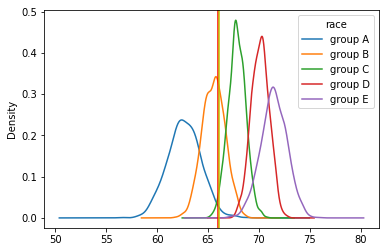

In [20]:
bs_id = []
for i in range(1000):
    bs_mean = df.sample(frac=1,replace=True).groupby('race')['math_score'].mean()
    bs_id.append(bs_mean)
    
bs_id = pd.DataFrame(bs_id)
ax = bs_id.plot(kind='kde')
ax.axvline(df['math_score'].median(),c='r')
ax.axvline(df['math_score'].mean(), c='y')

bs_id = []
for i in range(1000):
    bs_mean = df.sample(frac=1,replace=True).groupby('race')['reading_score'].mean()
    bs_id.append(bs_mean)
bs_id = pd.DataFrame(bs_id)
ax = bs_id.plot(kind='kde')
ax.axvline(df['math_score'].median(),c='r')
ax.axvline(df['math_score'].mean(), c='y')

bs_id = []
for i in range(1000):
    bs_mean = df.sample(frac=1,replace=True).groupby('race')['writing_score'].mean()
    bs_id.append(bs_mean)
    
bs_id = pd.DataFrame(bs_id)
ax = bs_id.plot(kind='kde')
ax.axvline(df['math_score'].median(),c='r')
ax.axvline(df['math_score'].mean(), c='y')

#### Let's see if this is still the case after scaling the data to uniformity

In [21]:
df = pd.get_dummies(df, columns=['gender','test_prep'])
# Removed gender from get dummies for intermediate testing purposes only, add back after testin 7/9/2019 @ 11:49AM
df.drop('lunch', axis=1, inplace=True)
df.drop_duplicates(inplace=True)
for col in df.columns:
    if df[col].dtypes == 'object':
        df[col].fillna('Missing', inplace=True)
    else:
        df[col].fillna(0,inplace=True)
        
parental_map = {'some high school':1, 'high school':2,'some college':3,'associate\'s degree':4,
                'bachelor\'s degree':5,'master\'s degree':6}
def map_parental():
    df['parental_level_of_education'] = df['parental_level_of_education'].map(parental_map)
def unmap_parental():
    parental_unmap = {value:key for key, value in parental_map.items()}
    df['parental_level_of_education'] = df['parental_level_of_education'].map(parental_unmap)
    
map_parental()

In [271]:
df.head()

,race,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,test_prep_completed,test_prep_none
0,group B,5,72,72,74,1,0,0,1
1,group C,3,69,90,88,1,0,1,0
2,group B,6,90,95,93,1,0,0,1
3,group A,4,47,57,44,0,1,0,1
4,group C,3,76,78,75,0,1,0,1


In [22]:
x = df.drop('race',axis=1)
y = df.race
st = StandardScaler()
test = st.fit_transform(x)
test = pd.DataFrame(test, columns=['parental_level_of_education','math_score','reading_score','writing_score','gender_female',
                                  'gender_male','test_prep_completed','test_prep_none'])
test['race'] = df['race']

In [23]:
test.head()

,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,test_prep_completed,test_prep_none,race
0,1.314975,0.389758,0.194466,0.391718,0.965558,-0.965558,-0.747330,0.747330,group B
1,-0.054848,0.191908,1.427505,1.313104,0.965558,-0.965558,1.338097,-1.338097,group C
2,1.999886,1.576855,1.770015,1.642171,0.965558,-0.965558,-0.747330,0.747330,group B
3,0.630064,-1.258988,-0.833065,-1.582682,-1.035671,1.035671,-0.747330,0.747330,group A
4,-0.054848,0.653557,0.605479,0.457531,-1.035671,1.035671,-0.747330,0.747330,group C


In [24]:
test['parental_level_of_education'].sort_values().unique()

array([-1.42467051, -0.73975913, -0.05484776,  0.63006362,  1.31497499,
        1.99988636])

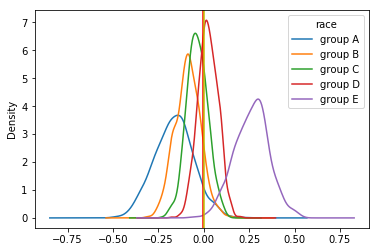

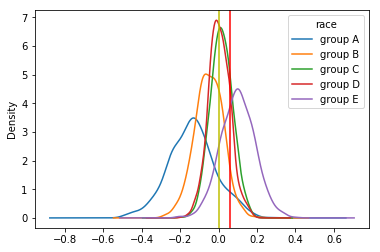

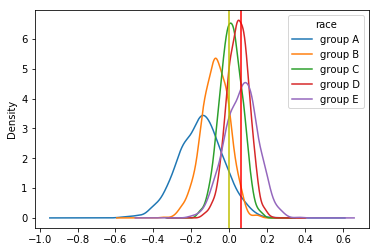

In [27]:
bs_id = []
for i in range(1000):
    bs_mean = test.sample(frac=1,replace=True).groupby('race')['math_score'].mean()
    bs_id.append(bs_mean)
    
bs_id = pd.DataFrame(bs_id)
ax = bs_id.plot(kind='kde')
ax.axvline(test['math_score'].median(),c='r')
ax.axvline(test['math_score'].mean(), c='y')

bs_id = []
for i in range(1000):
    bs_mean = test.sample(frac=1,replace=True).groupby('race')['reading_score'].mean()
    bs_id.append(bs_mean)
bs_id = pd.DataFrame(bs_id)
ax = bs_id.plot(kind='kde')
ax.axvline(test['reading_score'].median(),c='r')
ax.axvline(test['reading_score'].mean(), c='y')

bs_id = []
for i in range(1000):
    bs_mean = test.sample(frac=1,replace=True).groupby('race')['writing_score'].mean()
    bs_id.append(bs_mean)
    
bs_id = pd.DataFrame(bs_id)
ax = bs_id.plot(kind='kde')
ax.axvline(test['writing_score'].median(),c='r')
ax.axvline(test['writing_score'].mean(), c='y')

In [165]:
# def ecdf(data):
#     n = len(data)
#     x = np.sort(data)
#     y = np.arange(1, n+1)/n
#     return x, y

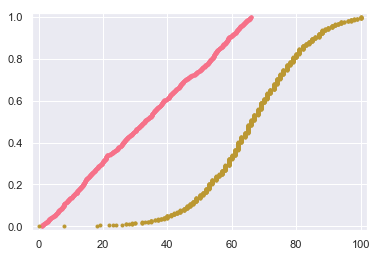

In [204]:
# x, y = ecdf(df['math_score'])
# theor_math = np.random.uniform(df['math_score'].mean(),size=1000)
# x_ther, y_ther = ecdf(theor_math)
# plt.plot(x_ther, y_ther, marker='.', linestyle='none')
# plt.plot(x, y, marker='.', linestyle='none')
# plt.margins(0.02)
# plt.show()

In [13]:
#Race A
bs_id['ga'] = (bs_id['group A'] - bs_id['group B'])/bs_id['group B']*100
prob_shs = (bs_id['ga']>0.25).sum()/len(bs_id['ga']>0.25)
print('{}%'.format(prob_shs*100))

#Race B
bs_id['gb'] = (bs_id['group B'] - bs_id['group C'])/bs_id['group C']*100
prob_shs = (bs_id['gb']>1).sum()/len(bs_id['gb']>1)
print('{}%'.format(prob_shs*100))

#Race C
bs_id['gc'] = (bs_id['group C'] - bs_id['group D'])/bs_id['group D']*100
prob_shs = (bs_id['gc']>1).sum()/len(bs_id['gc']>1)
print('{}%'.format(prob_shs*100))

#Race D
bs_id['gd'] = (bs_id['group D'] - bs_id['group E'])/bs_id['group E']*100
prob_shs = (bs_id['gd']>1).sum()/len(bs_id['gd']>1)
print('{}%'.format(prob_shs*100))

#Race E
bs_id['ge'] = (bs_id['group E'] - bs_id['group D'])/bs_id['group D']*100
prob_shs = (bs_id['ge']>1).sum()/len(bs_id['ge']>1)
print('{}%'.format(prob_shs*100))

57.089999999999996%
30.659999999999997%
22.869999999999997%
23.53%
42.27%


In [79]:
# Gender binary coded
# Race/ethnicity = Labels
# Ordinal Categorical column
# Lunch binary/ dropped
# test preparation binary
# math score, reading score, and writing score non scaled or normalized

In [80]:
# df = pd.get_dummies(df, columns=['gender','test_prep'])
# # Removed gender from get dummies for intermediate testing purposes only, add back after testin 7/9/2019 @ 11:49AM
# df.drop('lunch', axis=1, inplace=True)
# df.drop_duplicates(inplace=True)
# for col in df.columns:
#     if df[col].dtypes == 'object':
#         df[col].fillna('Missing', inplace=True)
#     else:
#         df[col].fillna(0,inplace=True)
        
# parental_map = {'some high school':1, 'high school':2,'some college':3,'associate\'s degree':4,
#                 'bachelor\'s degree':5,'master\'s degree':6}
# def map_parental():
#     df['parental_level_of_education'] = df['parental_level_of_education'].map(parental_map)
# def unmap_parental():
#     parental_unmap = {value:key for key, value in parental_map.items()}
#     df['parental_level_of_education'] = df['parental_level_of_education'].map(parental_unmap)
    
# map_parental()

In [81]:
# df.isna().sum()

* A quick comparison of the level of parental education compared to the overall score in Math, Reading and Writing

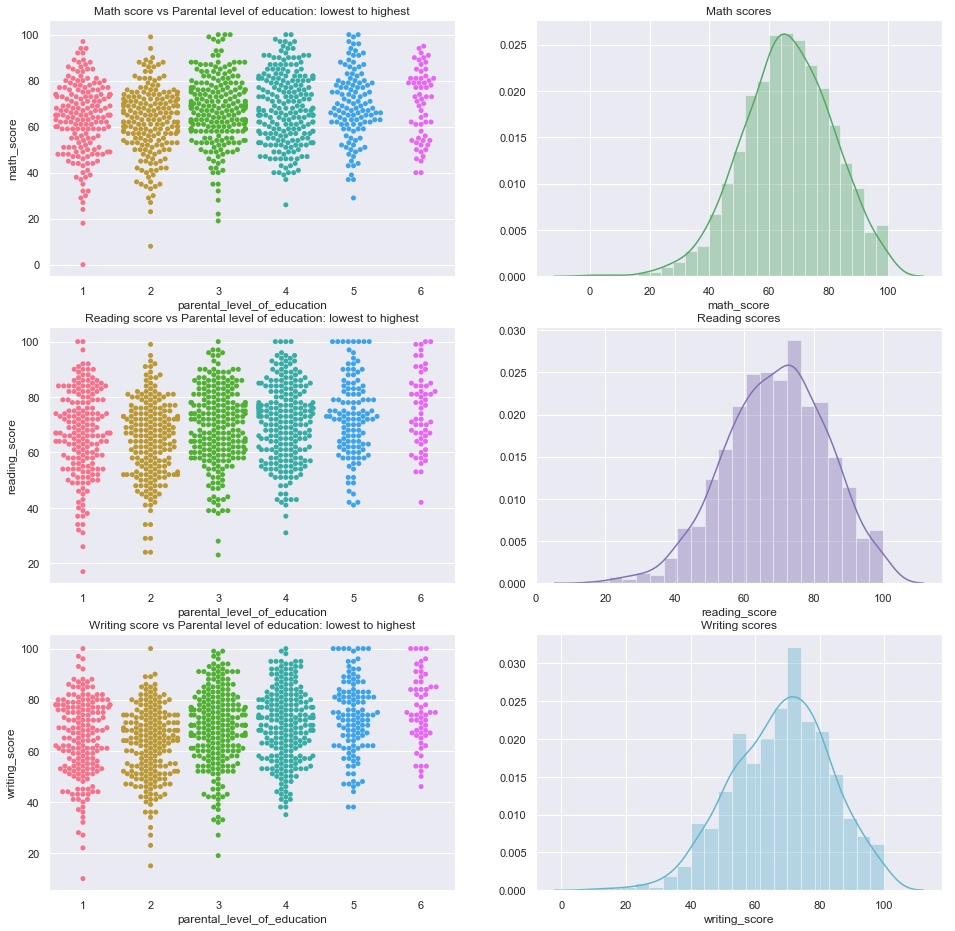

In [83]:
plt.figure(figsize=(16,16))
sns.set(color_codes=True)
sns.set_palette('husl')


# Math score plots
plt.subplot(3,2,1)
plt.title('Math score vs Parental level of education: lowest to highest')
sns.swarmplot(x='parental_level_of_education', y='math_score', data=df)
plt.subplot(3,2,2)
plt.title('Math scores')
sns.distplot(df['math_score'], color='g')

# Reading score plots
plt.subplot(3,2,3)
plt.title('Reading score vs Parental level of education: lowest to highest')
sns.swarmplot(x='parental_level_of_education', y='reading_score', data=df)
plt.subplot(3,2,4)
plt.title('Reading scores')
sns.distplot(df['reading_score'], kde_kws={'shade':False}, kde=True, color='m')

# Writing score plots
plt.subplot(3,2,5)
plt.title('Writing score vs Parental level of education: lowest to highest')
sns.swarmplot(x='parental_level_of_education', y='writing_score', data=df)
plt.subplot(3,2,6)
plt.title('Writing scores')
sns.distplot(df['writing_score'], color='c')
plt.show()

* Let's take a look at the mean, standard deviation and variance of all recorded race/ethinicity groups to see if one race/ethnicity out scores all others groups

In [84]:
# g = sns.pairplot(df.query('parental_level_of_education <= 3'),
#             vars=['math_score', 'reading_score','writing_score'],
#             hue='parental_level_of_education', palette='husl', plot_kws={'alpha': 0.9})
# plt.title('Student performance with parental education of some college or lower')
# g.fig.set_size_inches(15,15)
# plt.show()

# g = sns.pairplot(df.query('parental_level_of_education >= 4'),
#             vars=['math_score', 'reading_score','writing_score'],
#             hue='parental_level_of_education', palette='husl', plot_kws={'alpha': 0.9})
# plt.title('Student performance with parental education of an associate\'s degree or higher')
# g.fig.set_size_inches(15,15)
# plt.show()

In [85]:
np.round(df.groupby('race')[['math_score','reading_score','writing_score']].agg(['mean','std']),2)

math_score        reading_score        writing_score       
              mean    std          mean    std          mean    std
race                                                               
group A      61.63  14.52         64.67  15.54         62.67  15.47
group B      63.45  15.47         67.35  15.18         65.60  15.63
group C      64.46  14.88         69.08  14.01         67.81  15.00
group D      67.36  13.77         70.03  13.90         70.15  14.37
group E      73.82  15.53         73.03  14.87         71.41  15.11

* Looks like the group E performed overall better than all other groups
* Let's take a closer look to see if this due to having parents with higher level of education 

In [87]:
# sns.set()
# plt.figure(figsize=(14,8))
# x_math, y_math = ecdf(df['math_score'])
# np.random.seed(1)
# x = np.mean(df['math_score'])
# exp = np.random.normal(x, size=1000)
# x_ther, y_ther = ecdf(exp)
# _ =plt.plot(x_ther, y_ther, marker='.', linestyle='none')
# _ =plt.plot(x_math, y_math, marker='.', linestyle='none')
# plt.legend(['math score'], loc='lower right')
# plt.xlabel('Student math scores')
# plt.ylabel('ECDF')
# plt.show()

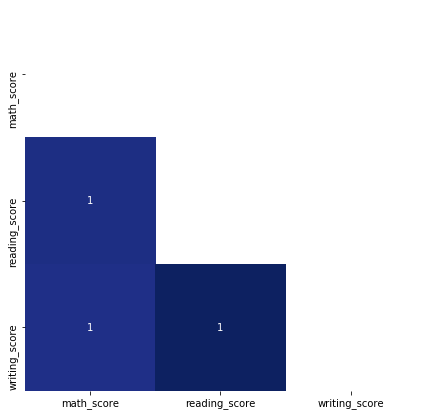

In [30]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(7,7))
sns.heatmap(corr, vmin=-1, vmax=1, annot=True, fmt='0.00f', cbar=False, cmap='YlGnBu', mask=mask)
plt.show()

* There seems to be no evidence that a parent's eductional level has any prediction on a student's performace
* Are they any features that can be engineered that could help in the prediction of the race/ethnicity of a student?

In [89]:
# Filtering each score column to apply the mean for further analysis 
math_score_A = df['math_score']>=90
math_score_B = (df['math_score']>=80) & (df['math_score'] <=89)
math_score_C = (df['math_score']>=70) & (df['math_score'] <=79)
math_score_D = (df['math_score']>=60) & (df['math_score'] <=69)
math_score_F = df['math_score'] <=59

reading_score_A = df['reading_score']>=90
reading_score_B = (df['reading_score']>=80) & (df['reading_score'] <=89)
reading_score_C = (df['reading_score']>=70) & (df['reading_score'] <=79)
reading_score_D = (df['reading_score']>=60) & (df['reading_score'] <=69)
reading_score_F = df['reading_score'] <=59

writing_score_A = df['writing_score']>=90
writing_score_B = (df['writing_score']>=80) & (df['writing_score'] <=89)
writing_score_C = (df['writing_score']>=70) & (df['writing_score'] <=79)
writing_score_D = (df['writing_score']>=60) & (df['writing_score'] <=69)
writing_score_F = df['writing_score'] <=59

In [90]:
math_list, reading_list, writing_list = [], [], []

for score in [math_score_A,math_score_B,math_score_C,math_score_D,math_score_F]:
    math_list.append(int(df[score]['math_score'].mean()))
for score in [reading_score_A,reading_score_B,reading_score_C,reading_score_D,reading_score_F]:
    reading_list.append(int(df[score]['reading_score'].mean()))
for score in [writing_score_A,writing_score_B,writing_score_C,writing_score_D,writing_score_F]:
    writing_list.append(int(df[score]['writing_score'].mean()))


In [91]:
# NEED TO FIX THIS
def map_grade(row, a, b, c, d, f):
    if row >= 90:
        row = a
    elif (row <=89 & row >= 80):
        row = b
    elif (row <=79 & row >= 70):
        row = c
    elif (row <=69 & row >= 60):
        row = d
    elif (row <= 59):
        row = f
    return row

In [92]:
df['alpha_math_score'] = df['math_score'].apply(map_grade, args=math_list)
df['alpha_reading_score'] = df['reading_score'].apply(map_grade, args=reading_list)
df['alpha_writing_score'] = df['writing_score'].apply(map_grade, args=writing_list)

In [93]:
# plt.figure(figsize=(7,7))
# x_alpha, y_alpha = ecdf(df['alpha_math_score'])
# x, y = ecdf(df['math_score'])
# plt.plot(y_alpha, x_alpha, marker='.', linestyle='none')
# plt.plot(y, x, marker='.', linestyle='none')
# plt.show()

In [94]:
# Sanity check
df.tail(10)
# They are getting mean scores higher than they should be needs to be fixed!!!
# I believe it is fixed now

,race,parental_level_of_education,math_score,reading_score,writing_score,gender_female,gender_male,test_prep_completed,test_prep_none,alpha_math_score,alpha_reading_score,alpha_writing_score
990,group E,2,86,81,75,0,1,1,0,86,84,74
991,group B,1,65,82,78,1,0,1,0,64,82,74
992,group D,4,55,76,76,1,0,0,1,49,74,74
993,group D,5,62,72,74,1,0,0,1,62,74,74
994,group A,2,63,63,62,0,1,0,1,63,63,62
995,group E,6,88,99,95,1,0,1,0,83,94,94
996,group C,2,62,55,55,0,1,0,1,62,50,49
997,group C,2,59,71,65,1,0,1,0,49,74,64
998,group D,3,68,78,77,1,0,1,0,64,74,74
999,group D,3,77,86,86,1,0,0,1,74,86,86


In [95]:
df = df.reindex(columns=['race','math_score','reading_score','writing_score','alpha_math_score','alpha_reading_score','alpha_writing_score','parental_level_of_education','gender_female','gender_male','test_prep_completed','test_prep_none'])
df.head()

,race,math_score,reading_score,writing_score,alpha_math_score,alpha_reading_score,alpha_writing_score,parental_level_of_education,gender_female,gender_male,test_prep_completed,test_prep_none
0,group B,72,72,74,74,74,74,5,1,0,0,1
1,group C,69,90,88,64,94,83,3,1,0,1,0
2,group B,90,95,93,94,94,94,6,1,0,0,1
3,group A,47,57,44,49,50,49,4,0,1,0,1
4,group C,76,78,75,74,74,74,3,0,1,0,1


In [96]:
X = df.drop('race', axis=1)
y = df['race']

In [97]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.1, random_state=123)

In [98]:
pipelines = {
                'nb' : make_pipeline(StandardScaler(),GaussianNB()),
                'dt' : make_pipeline(StandardScaler(),DecisionTreeClassifier(random_state=123)),
                'gb' : make_pipeline(StandardScaler(),GradientBoostingClassifier(random_state=123))
            }

nb_hyperparameters = {

}

dt_hyperparameters = {
                'decisiontreeclassifier__min_samples_leaf': [1,3,5],
                'decisiontreeclassifier__min_samples_split': [2,3,4],
                        }

gb_hyperparemeters = {
                'gradientboostingclassifier__learning_rate': [0.1, 0.05, 0.025],
                'gradientboostingclassifier__n_estimators': [25,50,75,100],
}

hyperparameters = {
                    'nb' : nb_hyperparameters,
                    'dt' : dt_hyperparameters,
                    'gb' : gb_hyperparemeters
}

In [99]:
# pipelines['gb'].get_params()

In [100]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyperparameters[name], cv=10, n_jobs=-1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

nb has been fitted.
dt has been fitted.
gb has been fitted.


In [101]:
from sklearn.exceptions import NotFittedError

for name, model in fitted_models.items():
    try:
        pred = model.predict(X_test)
        print(name, 'has been fitted.')
    except NotFittedError as e:
        print(repr(e))

nb has been fitted.
dt has been fitted.
gb has been fitted.


In [102]:
for name, model in fitted_models.items():
    print( name, model.best_score_ )

nb 0.26585094549499444
dt 0.25027808676307006
gb 0.3437152391546162


In [103]:
fitted_models['gb'].best_estimator_

Pipeline(memory=None,
     steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('gradientboostingclassifier', GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.025, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
 ...       presort='auto', random_state=123, subsample=1.0, verbose=0,
              warm_start=False))])